In [1]:
%matplotlib inline
import imp
import pandas as pd
import geopandas as gpd
from pyproj import Proj
import pyproj
from shapely.ops import transform
import seaborn
import numpy as np
from functools import partial
from shapely.geometry import Point, Polygon, MultiPolygon

In [2]:
from utils import add_forest_areas, dfci_to_wgs

#add_forest_areas('./data/FOR_PUBL_FR_SE.json', './data/FOR_PUBL_FR_SE_A.json')

In [45]:
fires = pd.read_csv('./data/train.csv')#./../../../../Downloads/liste_incendies_ du_31_01_2020.csv', sep=';', skiprows=2)

In [65]:
fires.head()

,Année,Numéro,Type de feu,Département,Code INSEE,Commune,Lieu-dit,Code du carreau DFCI,Alerte,Origine de l'alerte,Surface parcourue (m2)
0,1973,6389,9,66,66196,Sorède,piste dfci al33 mas berdaguer,GC42F25,1973-01-07 12:41:00,3.0,NaN
1,1973,8,0,06,06060,Falicon,FALICON,R21B03,1973-01-09 13:50:00,3.0,10000.0
2,1973,6102,9,84,84078,Mondragon,NaN,N20H16,1973-01-12 18:35:00,NaN,0.0
3,1973,6106,9,84,84140,Vaugines,NaN,O21C16,1973-01-13 18:30:00,NaN,0.0
4,1973,4789,9,34,34078,Claret,NaN,M21G13,1973-01-21 16:00:00,NaN,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13f685b00>]],
      dtype=object)

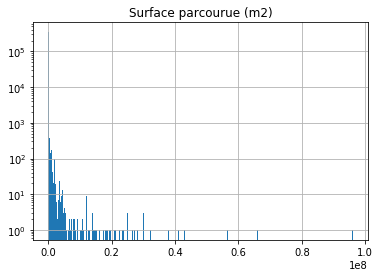

In [66]:
fires[fires['Surface parcourue (m2)']<1e+08].hist('Surface parcourue (m2)', bins = 1000, log=True)

In [67]:
fires.describe()

,Année,Numéro,Type de feu,Origine de l'alerte,Surface parcourue (m2)
count,490401.000000,490401.000000,490401.000000,230880.000000,3.525530e+05
mean,1993.928236,5831.041370,6.906146,3.044287,2.632287e+04
std,13.000699,4048.885052,3.802695,0.826726,5.987885e+05
min,1973.000000,1.000000,0.000000,1.000000,0.000000e+00
25%,1983.000000,2611.000000,9.000000,3.000000,0.000000e+00
50%,1991.000000,5226.000000,9.000000,3.000000,0.000000e+00
75%,2005.000000,8192.000000,9.000000,3.000000,1.000000e+03
max,2020.000000,19751.000000,9.000000,6.000000,1.158000e+08


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


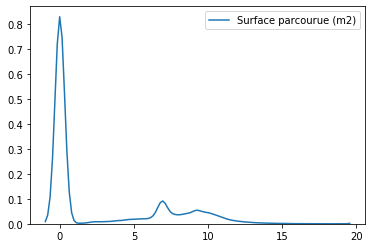

In [75]:
logSurf = np.log10(np.clip(fires['Surface parcourue (m2)'], a_min=1, a_max=None))
seaborn.kdeplot(logSurf)

In [74]:
np.log(5e5)

13.122363377404328

In [83]:
fires['Surface parcourue (m2)'][(fires['Surface parcourue (m2)'].isna()) | (fires['Surface parcourue (m2)'] == 0)].shape[0]/fires.shape[0]

0.7673495771827545

In [85]:
.shape[0]/fires.shape[0]

0.7673495771827545

In [89]:
fires[(fires['Type de feu']==0) & (fires['Surface parcourue (m2)']== 0)].shape

(0, 11)

In [5]:
fire[['lat', 'lon']] = fires['DFCI_coordinate'].apply(dfci_to_wgs)

ValueError: invalid literal for int() with base 10: 'B'

In [177]:
valid_dfci_letters = 'ABCDEFGHKLMN'
#fires['DFCI_coordinate'].apply(lambda x: x if x[0] in valid_dfci_letters else valid_dfci_letters.find(x[0])).sum()

In [24]:
fires['Surface parcourue (m2)'].sum()

30658716

In [4]:
departments = gpd.read_file('../../../../../Downloads/contours-geographiques-des-departements-2019.geojson').set_index('insee_dep')

In [41]:
our_departments = fires['Department'].unique()
departments_of_interest = departments.reset_index()[departments.reset_index()['insee_dep'].isin(our_departments)][['geometry', 'insee_dep']]
possible_squares = departments_of_interest.apply(lambda x: (x['insee_dep'], [(coord,x['geometry'].intersection(square).area, x['geometry'].intersection(square)) for coord,square in carroyage.reset_index()[['COORD_100', 'geometry']].to_numpy() if x['geometry'].intersects(square)]), axis=1, result_type='expand')
possible_squares = possible_squares.rename(columns={0:'dep', 1:'square_coord'}).set_index('dep')

,square_coord
dep,
05,"[(KE, 0.23524297968221936, POLYGON ((5.9511214..."
2A,"[(NB, 0.3455104028537698, (POLYGON ((8.5979763..."
11,"[(FC, 0.2015630331663055, POLYGON ((1.77950052..."
83,"[(KC, 0.014073908373870979, (POLYGON ((5.75217..."
13,"[(HD, 0.16605295790605085, (POLYGON ((4.404683..."
30,"[(GD, 0.04361513946505431, POLYGON ((3.3236337..."
84,"[(HD, 0.004363641581048193, (POLYGON ((4.82411..."
48,"[(GE, 0.3618226903377088, POLYGON ((3.04993019..."
34,"[(GD, 0.4672719411769453, (POLYGON ((3.5010486..."


In [88]:
square_poly.intersects(dep_poly)

array([ True])

In [91]:
carroyage['geometry']

COORD_100
AA    POLYGON ((-4.683890624179722 40.27108311164201...
AB    POLYGON ((-4.789769620126292 41.16313991271785...
AC    POLYGON ((-4.898797540425189 42.0563106446552,...
AD    POLYGON ((-5.011203279184085 42.95033181312999...
AE    POLYGON ((-5.127144923221403 43.84499644636202...
                            ...                        
NH    POLYGON ((8.871871892322154 46.61286468184019,...
NK    POLYGON ((8.982109195274971 47.50929196831891,...
NL    POLYGON ((9.096119499366559 48.40529329853517,...
NM    POLYGON ((9.214101710998571 49.30063952086534,...
NN    POLYGON ((9.336266167933237 50.19509903633275,...
Name: geometry, Length: 144, dtype: object

In [5]:
from shapely.geometry import Point, Polygon
carroyage = gpd.read_file('../../../../../Downloads/CARRO_DFCI_100x100_L93/CARROYAGE_DFCI_100X100.shp').set_index('COORD_100')

proj = partial(pyproj.transform, Proj('epsg:2154'), Proj('epsg:4326'))
new_polygons = []
for poly in carroyage['geometry']:
    new_poly = transform(proj, poly)
    new_poly = transform(lambda *x: x[::-1], new_poly)
    new_polygons.append(new_poly)
carroyage['geometry'] = new_polygons

In [93]:
carroyage.reset_index().to_file('../../../../../Downloads/carroyage_93.json', driver='GeoJSON')

In [56]:
carroyage

,COORD_100,geometry,geometry_wgs
0,AA,"POLYGON ((40.27108 -4.68389, 40.36024 -4.69433...","POLYGON ((40.27108 -4.68389, 40.36024 -4.69433..."
1,AB,"POLYGON ((41.16314 -4.78977, 41.25241 -4.80052...","POLYGON ((41.16314 -4.78977, 41.25241 -4.80052..."
2,AC,"POLYGON ((42.05631 -4.89880, 42.14568 -4.90988...","POLYGON ((42.05631 -4.89880, 42.14568 -4.90988..."
3,AD,"POLYGON ((42.95033 -5.01120, 43.03977 -5.02264...","POLYGON ((42.95033 -5.01120, 43.03977 -5.02264..."
4,AE,"POLYGON ((43.84500 -5.12714, 43.93449 -5.13894...","POLYGON ((43.84500 -5.12714, 43.93449 -5.13894..."
...,...,...,...
139,NH,"POLYGON ((46.61286 8.87187, 46.70252 8.88273, ...","POLYGON ((46.61286 8.87187, 46.70252 8.88273, ..."
140,NK,"POLYGON ((47.50929 8.98211, 47.59892 8.99334, ...","POLYGON ((47.50929 8.98211, 47.59892 8.99334, ..."
141,NL,"POLYGON ((48.40529 9.09612, 48.49486 9.10774, ...","POLYGON ((48.40529 9.09612, 48.49486 9.10774, ..."
142,NM,"POLYGON ((49.30064 9.21410, 49.39013 9.22613, ...","POLYGON ((49.30064 9.21410, 49.39013 9.22613, ..."


In [ ]:
fires['DFCI_coordinate'] = fires[['Department', 'DFCI_coordinate']].apply(replace_wrong_dfci_coordinate, axis=1)

In [53]:
def replace_wrong_dfci_coordinate(x):
    valid_letters = 'ABCDEFGHKLMN'
    dep = x['Department']
    DFCI_coord = x['DFCI_coordinate'].upper()
    if not DFCI_coord[-2].isdigit():
        randoms = np.random.rand(2)
        token = str(int(4*randoms[0])+1)
        if randoms[1] < 1/4:
            token = '5'
        return np.nan#DFCI_coord + token
    if len(DFCI_coord) == 4:
        return np.nan#DFCI_coord + 'E53'
    if len(DFCI_coord) != 7:
        possible_squares_dep = possible_squares.loc[dep]['square_coord']
        squares, probas, intersecs = list(zip(*possible_squares_dep))
        square_id = np.random.choice(np.arange(0,len(probas)), p=np.array(probas)/sum(probas))
        return draw_random_dfci_coordinate_from_100_in_inter(squares[square_id], intersecs[square_id])
    return DFCI_coord
        
def draw_random_dfci_coordinate_from_100_in_inter(big_square_coordinate, intersec):
    point = Point(0,0)
    valid_letters = 'ABCDEFGHKL'
    while(not point.within(intersec)):
        dfci_coordinate = big_square_coordinate
        randoms = np.random.rand(5)
        dfci_coordinate += str(int(5*randoms[0]) * 2)
        dfci_coordinate += str(int(5*randoms[1]) * 2)
        dfci_coordinate += valid_letters[int(10*randoms[2])]
        dfci_coordinate += str(int(10*randoms[3]))
        dfci_coordinate += str(int(5*randoms[4]) + 1)
        lat, lon = dfci_to_wgs([dfci_coordinate])
        point = Point(lon[0], lat[0])
    return point

In [40]:
%run utils.py
lat, lon = dfci_to_wgs(fires[fires['DFCI_coordinate'].notna()]['DFCI_coordinate'].values)

fire_points = gpd.GeoDataFrame({'geometry':[Point(y,x) for x,y in zip(lat, lon)]})

fire_points.to_file('../../../../../Downloads/fire_points.json', driver='GeoJSON')

In [180]:
fires[['DFCI_coordinate','Department', 'Year']][fires['DFCI_coordinate'].apply(lambda x: x[0].upper() not in valid_dfci_letters)]

,DFCI_coordinate,Department,Year
1,R21B03,06,1973
3,O21C16,84,1973
6,O21F02,84,1973
7,P22O27,83,1973
8,P22O17,83,1973
...,...,...,...
125287,P24S20,83,1983
125302,Q23N09,83,1983
125311,Q22E10,83,1983
127653,Q23M07,83,1983


In [192]:
fires[(fires['Year'] > 1983) & (fires['DFCI_coordinate'].apply(lambda x: x[1].isdigit())) & (fires['DFCI_coordinate'].apply(len)<7)]

,Year,ID,Department,INSEE_code,Town,Locality,DFCI_coordinate,Signal,Origin,Area
136331,1984,13967,84,84087,Orange,NaN,N20C20,1984-06-29 18:34:00,NaN,0.001
